<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/main/Classifiacation_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 classes = ['NOISE', 'CLOUD'])

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            classes = ['NOISE', 'CLOUD'],
                                            shuffle = False)

# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(training_set, epochs = 10, validation_data = test_set)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)


Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 4s 173ms/step - loss: 0.5999 - accuracy: 0.7196 - val_loss: 0.5985 - val_accuracy: 0.7196
Epoch 2/10
18/18 [==============================] - 4s 211ms/step - loss: 0.6048 - accuracy: 0.7196 - val_loss: 0.5940 - val_accuracy: 0.7196
Epoch 3/10
18/18 [==============================] - 3s 160ms/step - loss: 0.5883 - accuracy: 0.7214 - val_loss: 0.5718 - val_accuracy: 0.7268
Epoch 4/10
18/18 [==============================] - 3s 163ms/step - loss: 0.5906 - accuracy: 0.7232 - val_loss: 0.5664 - val_accuracy: 0.7357
Epoch 5/10
18/18 [==============================] - 3s 160ms/step - loss: 0.5753 - accuracy: 0.7250 - val_loss: 0.5491 - val_accuracy: 0.7339
Epoch 6/10
18/18 [==============================] - 3s 161ms/step - loss: 0.5568 - accuracy: 0.7357 - val_loss: 0.5296 - val_accuracy: 0.7500
Epoch 7/10
18/18 [==============================] - 4s 209ms/step 

Noise example

In [18]:
# Load an image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/NOISE/cont_2.jpg', target_size = (64, 64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img = img / 255.0

# Make a prediction
prediction = model.predict(img)

# Check the result
if prediction[0][0] > 0.5:
    print('The image is classified as Cloud')
else:
    print('The image is classified as Noise')



1/1 [==============================] - 0s 56ms/step
The image is classified as Noise


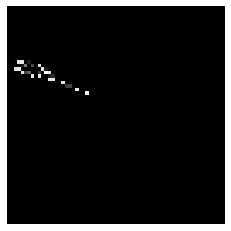

In [20]:
import matplotlib.pyplot as plt

# Load an image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/NOISE/cont_2.jpg', target_size = (64, 64))
img = image.img_to_array(img)

# Plot the image
plt.imshow(img / 255.0)
plt.axis('off')
plt.show()


Cloud example

In [22]:
# Load an image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/CLOUD/cont_0.jpg', target_size = (64, 64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img = img / 255.0

# Make a prediction
prediction = model.predict(img)

# Check the result
if prediction[0][0] > 0.5:
    print('The image is classified as Cloud')
else:
    print('The image is classified as Noise')



1/1 [==============================] - 0s 23ms/step
The image is classified as Cloud


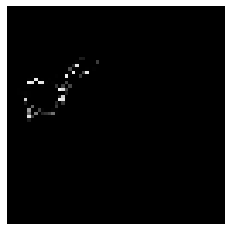

In [21]:
import matplotlib.pyplot as plt

# Load an image
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/CLOUD/cont_0.jpg', target_size = (64, 64))
img = image.img_to_array(img)

# Plot the image
plt.imshow(img / 255.0)
plt.axis('off')
plt.show()
